In [2]:
# Import the required modules
%pylab inline 
import cv2
import os
from IPython.display import clear_output
import datetime
# import pickle as cPickle
# import gzip

import numpy as np
%pylab inline 
import matplotlib.pyplot as pl

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [3]:
trainingSet = 'TrainingSet'
employees = 'Employees'
rascals = 'Rascals'

In [19]:
scaleFactor = 1.2
minNeighbors = 5
faceWidth = 100
faceHeight = 100

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [22]:
# read id from reader
for i in range(0,10):
    # reading input from card reader
    cardId = input()
    # need to test
    cap = cv2.VideoCapture(-1)
    # stripping first zeroes (to proper id)
    cardId = str(int(cardId))
    # reading time
    currentTime = datetime.datetime.now()
    strTime = currentTime.strftime("%d.%m.%Y-%H:%M:%S")
    # Defined path to folder
    empPath = os.path.join(trainingSet, employees, cardId)    
    if not os.path.exists(empPath):
        os.makedirs(empPath)
    # Reading single frame
    # ret, frame = cap.grab()
    retr = cap.grab()
    ret, frame = cap.retrieve(retr)
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detecting faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
    for (x,y,w,h) in faces:
        if ( w >= faceWidth and h >= faceHeight ):
            cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            crop = frame[y:(y+w),x:(x+h)]
            res = cv2.resize(crop,dsize=(faceWidth,faceHeight), interpolation = cv2.INTER_CUBIC)
            cv2.imwrite(os.path.join(empPath, '%s.jpg' %strTime), res)
            # TODO remove displayment            
            imshow(gray)
            show()
    cap.release()
    # Display the frame until new frame is available
    clear_output(wait=True)    
    if cardId == 'quit':
        break

0009011138


(243, 243, 3)


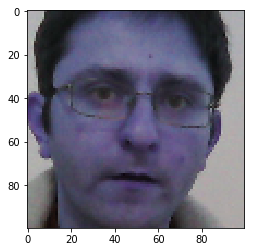

In [15]:
# print(shape(gray))
# print(x,y)
# crop = gray[y:(y+w),x:(x+h)]
# print(shape(frame))
# cv2.resize?
print(shape(crop))
# crop.resize(100,100)
res = cv2.resize(crop,dsize=(100,100), interpolation = cv2.INTER_CUBIC)
imshow(res)
show()

In [ ]:
cap.release()

In [54]:
try:
    cap = cv2.VideoCapture(-1)
    while(1):
        # Capture frame-by-frame
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Detecting faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
        for (x,y,w,h) in faces:
#             if ( w >= 200 and h >= 200 ):
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
#             roi_color = img[y:y+h, x:x+w]
#         imshow(frame)#cmap='Greys')
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    cap.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")

Released Video Resource


In [77]:
rascalPath = os.path.join(trainingSet, rascals)
for folder in os.listdir(rascalPath):
    personPath = os.path.join(rascalPath, folder)
    for personImage in os.listdir(personPath):
        img = os.path.join(personPath, personImage)
        frame = cv2.imread(img)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
        for (x,y,w,h) in faces:
            if ( w >= 100 and h >= 100 ):
                cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
                roi_gray = gray[y:y+h, x:x+w]
        imshow(frame)
        show()
        clear_output(wait=True)

KeyboardInterrupt: 